In [1]:
#Shared data exploration code
#RUN ONCE before working in your own cell below
from Dataset import Dataset,Explorer

datasets = [
            "876eedf5-4f78-4e61-aa0a-2a322e277922", # (0) Vessel Calls (>75 GT), Monthly
            "0db7afb5-bd73-4ae9-ba30-cc7037551cab", # (1) Vessel Arrivals (>75 GT), Monthly
            "44da3191-6c57-4d4a-8268-8e2c418d4b43", # (2) Bunker Sales, Monthly
            "cd119524-9f43-44df-a5f9-f6f6b207a72b", # (3) Container Throughput, Monthly
            "42707edf-aca4-417d-903b-a720645c11e1", # (4) Registered Vessels and Shipping Tonnage, Monthly'
            "9e26f922-03a1-4a11-96e7-dea61bd67a8c", # (5) Composite Leading Index, Quarterly
            "7e227620-eea6-4232-bb60-d2c6bbdc3a81", # (6) Average Monthly Recruitment/Resignation Rates by Industry and Occupational Group, Quarterly
            "7040ea00-8c8f-417c-bf55-3b779c3eacbb", # (7) Retrenched Employees by Industry and Occupational Group, Quarterly
            "ed6ca640-a1e6-4435-b06a-493981a620cd", # (8) Job Vacancy by Industry and Occupational Group, Quarterly
            "8b416bcb-7ab5-4650-8996-88fe629acebe", # (9) Job Vacancy Rate by Industry and Occupational Group, Quarterly
            "f0c761b8-85b3-4c0a-8599-f2b63e148579", # (10) Average Weekly Paid Overtime Hours Worked Per Employee By Industry, Quarterly
            "655a1c84-d371-4fb3-81b1-cf80f65b8052", # (11) Short Work-Week & Temporary Layoffs By Industry, Quarterly
            "64bede5b-353f-4be2-9321-91eadf3f92a2", # (12) Short Work-Week & Temporary Layoffs By Occupational Group, Quarterly
           ]

def main():
    for d,dset in enumerate(datasets):
        datasets[d] = Dataset(dset)
    print("All done!")
        
if __name__ == "__main__":
    main()

[876eedf5-4f78-4e61-aa0a-2a322e277922] Fetching metadata via API
[Vessel Calls (>75 GT), Monthly] Fetching data via API
[Vessel Calls (>75 GT), Monthly] Parsing metadata
[Vessel Calls (>75 GT), Monthly] Parsing data
[Vessel Calls (>75 GT), Monthly] Converting data to Pandas DataFrame
[Vessel Calls (>75 GT), Monthly] Column "purpose_type" does not appear to be numeric. Pandas says: "Unable to parse string "Supplies" at position 0"
[Vessel Calls (>75 GT), Monthly] Loaded
[0db7afb5-bd73-4ae9-ba30-cc7037551cab] Fetching metadata via API
[Vessel Arrivals (>75 GT) Total, Monthly ] Fetching data via API
[Vessel Arrivals (>75 GT) Total, Monthly ] Parsing metadata
[Vessel Arrivals (>75 GT) Total, Monthly ] Parsing data
[Vessel Arrivals (>75 GT) Total, Monthly ] Converting data to Pandas DataFrame
[Vessel Arrivals (>75 GT) Total, Monthly ] Loaded
[44da3191-6c57-4d4a-8268-8e2c418d4b43] Fetching metadata via API
[Bunker Sales Breakdown, Monthly] Fetching data via API
[Bunker Sales Breakdown, Month

# AFTER RUNNING THE ABOVE

Start in your code block below by creating an Explorer with the datasets you want from the list above, like:
```
> Explorer([datasets[0],datasets[1]])
```
(You can pass as many datasets into Explorer as you want - doesn't have to be two)
This will auto-generate a report and some basic plots for each dataset

You can then get the dataframes from the datasets directly to do additional exploration, like:
```
> df_0 = datasets[0].dataframe
```
Or, via the Explorer object, if you want to extend the Explorer functionality, like:
```
> my_explorer = Explorer([datasets[0],datasets[1]])
> df_0 = my_explorer.datasets[0].dataframe
```

FIXED ~~Note: Dataset[11] causes errors with the quarter dt format ~~
*From the logging, issue did appear to be with quarter date format, but was actually with "-" as null value in numeric fields. Quarters are working correctly, and null values are being handled properly*

VESSEL CALLS EXPLORATION
------------------------------
**Basic Stats**
Time period (by month): 1993-01-01 00:00:00 to 2021-10-01 00:00:00

Gross Tonnage - stats: 
 count      3460.000000
mean      52071.113955
std       45225.774852
min         373.511000
25%       17070.000000
50%       42025.410000
75%       85157.584000
max      196936.964000
Name: gross_tonnage, dtype: float64

Purpose Type - stats: 
 count         3460
unique           5
top       Supplies
freq           692
Name: purpose_type, dtype: object

Purpose Type - options: 
 ['Supplies' 'Others' 'Bunkers' 'Repairs' 'Cargo']

Number of Vessel Calls - stats: 
 count    3460.000000
mean     3045.619075
std      2136.926448
min        85.000000
25%      1335.000000
50%      2532.500000
75%      4556.000000
max      8220.000000
Name: number_of_vessel_calls, dtype: float64
------------------------------
**Quick Plots**
------------------------------
------------------------------

BUNKER SALES EXPORATION
---------------------

<AxesSubplot:title={'center':'Bunker Sales Through Time'}, xlabel='month'>

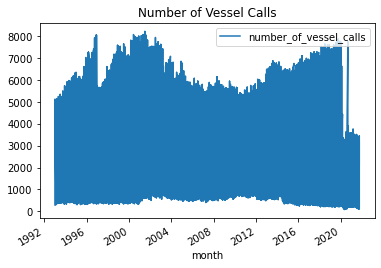

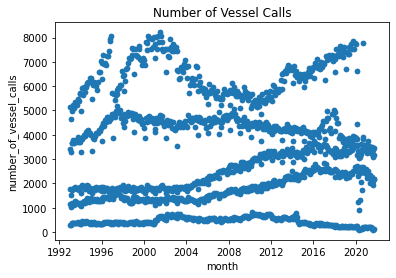

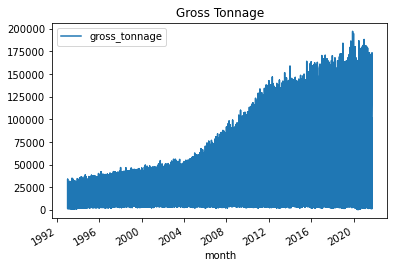

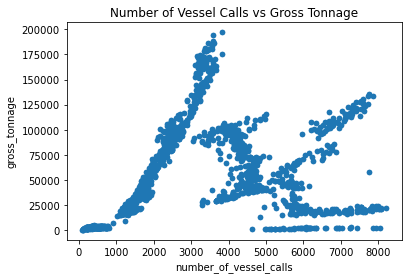

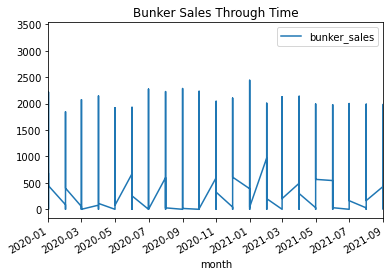

In [2]:
#Annie's code
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

#Explorer (datasets[0], datasets[2])
df_vc = datasets[0].dataframe
df_bs = datasets[2].dataframe

##Vessel Calls Exploration 
print('VESSEL CALLS EXPLORATION')
print('-'*30)

#Basic Stats 
print('**Basic Stats**')
print('Time period (by month):', df_vc.month.min(), 'to', df_vc.month.max())
print()
print('Gross Tonnage - stats: \n', df_vc.gross_tonnage.describe())
print()
print('Purpose Type - stats: \n', df_vc.purpose_type.describe())
print()
print('Purpose Type - options: \n', df_vc.purpose_type.unique())
print()
print('Number of Vessel Calls - stats: \n', df_vc.number_of_vessel_calls.describe())
print('-'*30)

#Quick Plots 
print('**Quick Plots**')
##FIX: NEED TO SPLIT NUMBER OF VESSEL CALLS AND GROSS TONNAGE BY PURPOSE TYPE
#df_vc_cargo = df_vc.loc[df_vc.purpose_type == 'cargo', 'month', 'number_of_vessel_calls']
df_vc.plot(x = 'month',y = 'number_of_vessel_calls', title = 'Number of Vessel Calls')
df_vc.plot.scatter(x='month', y='number_of_vessel_calls', title = 'Number of Vessel Calls')
df_vc.plot(x = 'month',y = 'gross_tonnage', title = 'Gross Tonnage')
df_vc.plot.scatter(x='number_of_vessel_calls', y='gross_tonnage', title = 'Number of Vessel Calls vs Gross Tonnage')


#scatter_gt_vc = 
#bar_ptype_vc = df_vc.plot.bar(x = df_vc.purpose_type.unique(), y = df_vc.purpose_type.count())
print('-'*30)
print('-'*30)

##Bunker Sales Exploration 
print()
print('BUNKER SALES EXPORATION')
print('-'*30)

#Basic Stats
print('Time period (by month):', df_bs.month.min(), 'to', df_bs.month.max())
print()
print('Gross Tonnage - stats: \n', df_bs.bunker_type.describe())
print()
print('Purpose Type - stats: \n', df_bs.bunker_sales.describe())
print('-'*30)

#Quick Plots
print('**Quick Plots**')
## NEED TO FIX BUNKER SALES BY BUNKER TYPE 
#bar_month_btype = df_bs.plot.bar(bunker_type)
df_bs.plot.line(x='month', y='bunker_sales', xlim = ('2020-01-01','2021-09-01'), title = 'Bunker Sales Through Time')
#bar_btype_bsales = df_bs.plot.bar(x='bunker_type', y='bunker_sales')


{'business and real estate services', 'administrative and support services', 'petroleum, chemical and pharmaceutical products', 'electrical products', 'transport and storage', 'professional services', 'food, beverages and tobacco', 'financial and insurance services', 'real estate and leasing services', 'medical and precision instruments', 'transport, storage and communications', 'fabricated metal products, machinery and equipment', 'construction', 'hotels and restaurants', 'financial intermediation', 'real estate services', 'others', 'fabricated metal products', 'petroleum and chemical products', 'information and communications', 'transport equipment', 'textile and wearing apparel', 'electronic products', 'machinery and equipment', 'paper,rubber,plastic products and printing', 'wholesale and retail trade', 'paper products and printing', 'transportation and storage', 'other manufacturing industries', 'community, social and personal services', 'financial services', 'accommodation and foo

<AxesSubplot:title={'center':'AVG OT Paid Hours (Transport)'}, xlabel='quarter'>

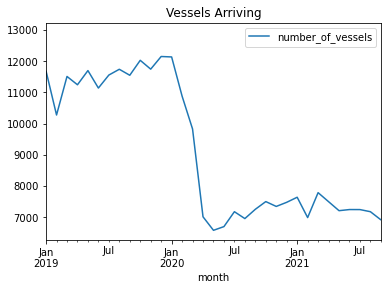

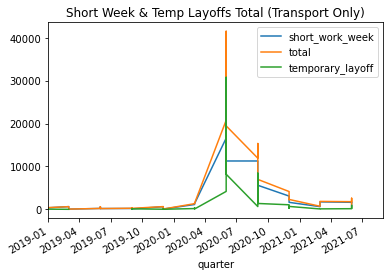

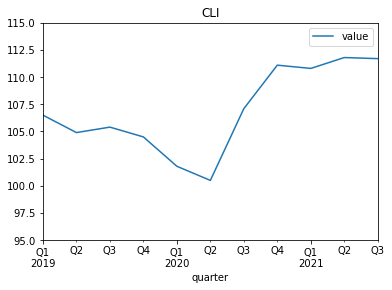

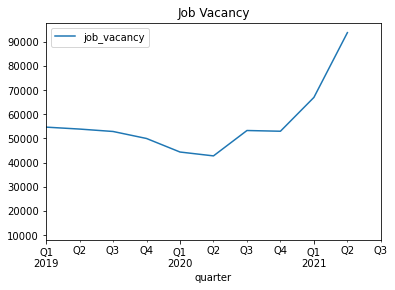

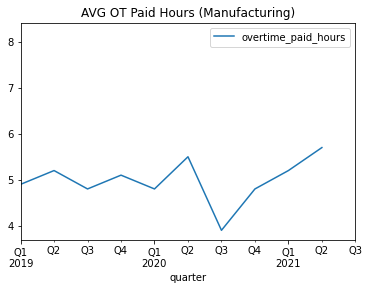

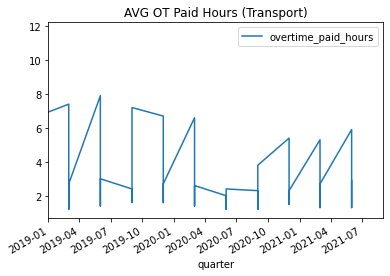

In [3]:
#Bri's code
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

#Explorer([datasets[1],datasets[11]])

df1 = datasets[1].dataframe  # Vessel Arrivals (>75 GT) Total, Monthly
df2 = datasets[12].dataframe # Short Work-Week and Temporary Layoffs by Broad Occupational Group
df3 = datasets[5].dataframe  # Composite Leading Index, Quarterly
df4 = datasets[8].dataframe  # Job Vacancy by Industry and Occupational Group, Quarterly
df5 = datasets[10].dataframe # Average Weekly Paid Overtime Hours Worked Per Employee By Industry, Quarterly

df2_filt = df2[df2['occupation1'].str.contains('transport')]
df5_filt_manu = df5[df5['industry2'].str.contains('manufact')]
df5_filt_trans = df5[df5['industry2'].str.contains('transport') | df5['industry2'].str.contains('trade')]


#print(df1)

ind = set(df5['industry2'])
print(ind)

df1.plot(x='month', y='number_of_vessels', xlim=('2019-01-01','2021-09-01'), title='Vessels Arriving')
df2.plot(x='quarter', xlim=('2019-01-01','2021-09-01'), title='Short Week & Temp Layoffs Total (Transport Only)')
df3.plot(x='quarter', xlim=('2019-01-01','2021-09-01'), ylim=(95,115), title='CLI')
df4.plot(x='quarter', xlim=('2019-01-01','2021-09-01'), title='Job Vacancy')
df5_filt_manu.plot(x='quarter', xlim=('2019-01-01','2021-09-01'), title='AVG OT Paid Hours (Manufacturing)')
df5_filt_trans.plot(x='quarter', xlim=('2019-01-01','2021-09-01'), title='AVG OT Paid Hours (Transport)')

Container Throughput, Monthly
--------------------
       container_throughput
count            322.000000
mean            2126.718838
std              698.866862
min              867.450000
25%             1403.790000
50%             2286.170000
75%             2693.620000
max             3270.574750
     container_throughput      month    quarter
_id                                            
322             2974.9310 2021-10-01 2021-12-01
321             3117.3595 2021-09-01 2021-09-01
320             3182.2810 2021-08-01 2021-09-01
319             3123.5595 2021-07-01 2021-09-01
318             3114.5065 2021-06-01 2021-06-01


Container Throughput, Quarterly
--------------------
       container_throughput
count            108.000000
mean            6340.772831
std             2105.291568
min             2783.350000
25%             4210.327500
50%             6908.095000
75%             7976.657500
max             9702.262750
   container_throughput    quarter
0            2974.9

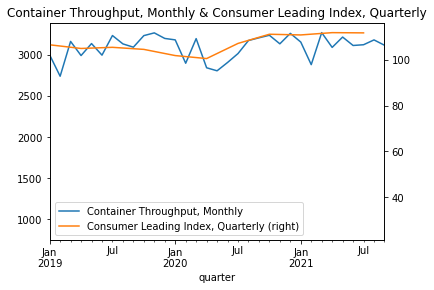

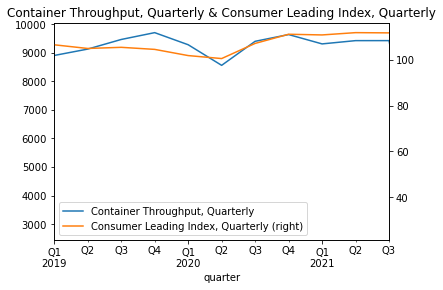

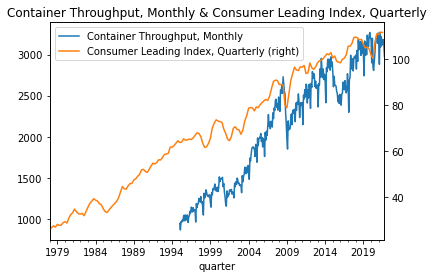

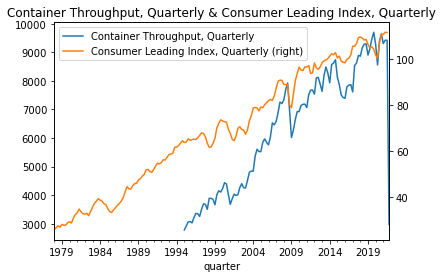

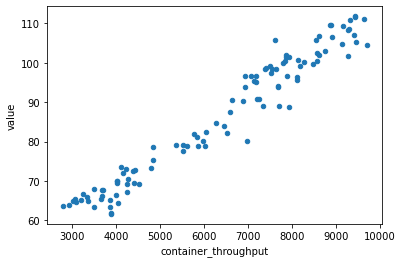

In [4]:
#Kevin's code
import pandas as pd
#Explorer([datasets[0],datasets[1],datasets[3],datasets[4]])

df_calls = datasets[0].dataframe
df_arriv = datasets[1].dataframe
df_ct = datasets[3].dataframe
df_cli = datasets[5].dataframe

label_ct = "Container Throughput, Monthly"
label_cli = "Consumer Leading Index, Quarterly"
label_ct_q = "Container Throughput, Quarterly"

#Add quarter date corresponding to month date to throughput data
df_ct["quarter"] = df_ct["month"].map(lambda date: date.replace(month=3 if date.month < 4 else 6 if date.month < 7 else 9 if date.month < 10 else 12))
#Create a new dataframe with container throughput totalled by quarter for comparison with CLI data
data_ct_quarters = []
for quarter in df_ct["quarter"].unique():
    quarterdata = df_ct[df_ct["quarter"] == quarter]
    data_ct_quarters.append([quarterdata["container_throughput"].sum(),quarter])
df_ct_q = pd.DataFrame(data_ct_quarters,columns=["container_throughput","quarter"])

#Create a merged dataframe on quarters for comparison below
df_ct_cli = df_ct_q.merge(df_cli,on='quarter')

print(label_ct)
print("-"*20)
print(df_ct.describe())
print(df_ct.head())
print("\n")
print(label_ct_q)
print("-"*20)
print(df_ct_q.describe())
print(df_ct_q.head())
print("\n")
print(label_cli)
print("-"*20)
print(df_cli.describe())
print(df_cli.head())

date_range = ('2019-01-01','2021-09-01')

#Time series: Monthly CT and Quarterly CLI, COVID period
plot_1 = df_ct.plot(x='month',y='container_throughput',xlim=date_range,title=f'{label_ct} & {label_cli}',label=label_ct)
plot_2 = df_cli.plot(ax=plot_1,secondary_y=True, x='quarter',y='value',xlim=date_range,label=label_cli)

#Time series: Quarterly CT and Quarterly CLI, COVID period
plot_3 = df_ct_q.plot(x='quarter',y='container_throughput',xlim=date_range,title=f'{label_ct_q} & {label_cli}',label=label_ct_q)
plot_4 = df_cli.plot(ax=plot_3,secondary_y=True, x='quarter',y='value',xlim=date_range,label=label_cli)

#Time series: Monthly CT and Quarterly CLI, all time
plot_1_all = df_ct.plot(x='month',y='container_throughput',title=f'{label_ct} & {label_cli}',label=label_ct)
plot_2_all = df_cli.plot(ax=plot_1_all,secondary_y=True, x='quarter',y='value',label=label_cli)

#Time series: Quarterly CT and Quarterly CLI, all time
plot_3_all = df_ct_q.plot(x='quarter',y='container_throughput',title=f'{label_ct_q} & {label_cli}',label=label_ct_q)
plot_4_all = df_cli.plot(ax=plot_3_all,secondary_y=True, x='quarter',y='value',label=label_cli)

#Scatter: Quarterly CT and Quarterly CLI, all time
plot_5 = df_ct_cli.plot.scatter(x='container_throughput',y='value')

outliers = df_ct_cli[df_ct_cli["container_throughput"] < 2000]

for index,row in outliers.iterrows():
    plot_5.text(row['container_throughput'],row["value"],f'Q{row["quarter"].quarter} {row["quarter"].year}')

   gross_tonnage      month  number_of_vessel_calls
0    1060969.694 2019-10-01                   36008
1    1038379.014 2019-11-01                   35460
2    1089721.332 2019-12-01                   36784
3    1094512.000 2020-01-01                   36182
4     928158.000 2020-02-01                   32320


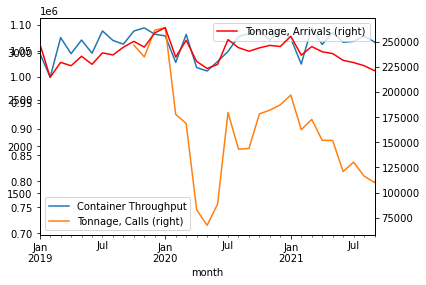

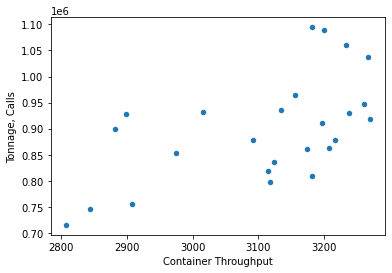

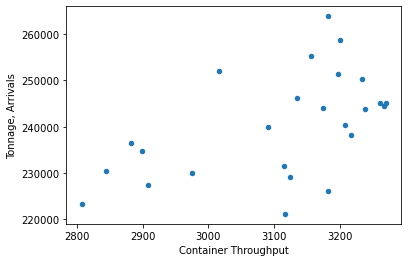

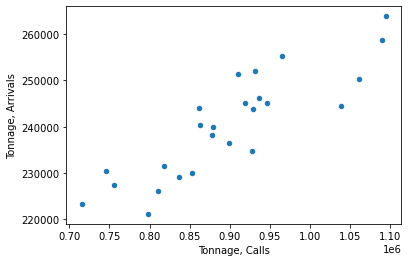

In [62]:
#Exploration of calls, arrivals, throughput
import pandas as pd

df_calls = datasets[0].dataframe
df_arriv = datasets[1].dataframe
df_ct = datasets[3].dataframe

#Sum df_calls by month
df_calls = df_calls.groupby(df_calls['month']).aggregate({'gross_tonnage': 'sum', 'month': 'first', 'number_of_vessel_calls': 'sum'})
df_calls.reset_index(drop=True, inplace=True)
print(df_calls.head())


df_ct_calls = df_ct.merge(df_calls,on='month')
df_ct_calls_arriv = df_ct_calls.merge(df_arriv,on='month')

plot_time_ct = df_ct.plot(x='month',y='container_throughput',xlim=('2019-01-01','2021-09-01'),label="Container Throughput")
plot_time_ct_calls = df_calls.plot(ax=plot_time_ct,secondary_y=True, x='month',y='gross_tonnage',xlim=('2019-01-01','2021-09-01'),label="Tonnage, Calls")
ax_ct_calls = plot_time_ct_calls.twinx()
plot_time_ct_calls_arriv = df_arriv.plot(ax=ax_ct_calls,secondary_y=True, x='month',y='gross_tonnage',xlim=('2019-01-01','2021-09-01'),label="Tonnage, Arrivals",color="#f00")

plot_calls_ct = df_ct_calls_arriv.plot.scatter(x='container_throughput',y='gross_tonnage_x',xlabel="Container Throughput",ylabel="Tonnage, Calls")
plot_arriv_ct = df_ct_calls_arriv.plot.scatter(x='container_throughput',y='gross_tonnage_y',xlabel="Container Throughput",ylabel="Tonnage, Arrivals")
plot_calls_arriv = df_ct_calls_arriv.plot.scatter(x='gross_tonnage_x',y='gross_tonnage_y',xlabel="Tonnage, Calls",ylabel="Tonnage, Arrivals")